In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV



In [3]:
# Read the data
data_2021 = pd.read_excel("/content/diabetes_binary_health_indicators_BRFSS2021.xlsx")

# Convert columns to factors
columns_to_convert = ["HighBP", "HighChol", "CholCheck",
                      "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity",
                      "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
                      "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Education", "Income"]

for col in columns_to_convert:
    data_2021[col] = data_2021[col].astype('category')



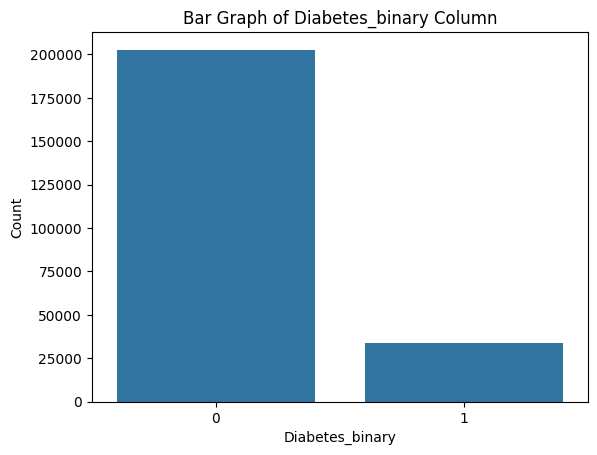

In [35]:
# Bar chart of the Binary_diabetes data

plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=data_2021)
plt.title('Bar Graph of Diabetes_binary Column')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()

In [4]:
high_corr = data_2021.corr()
high_corr_features = high_corr.index[abs(high_corr["Diabetes_binary"]) >= 0.1]
high_corr_features

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')

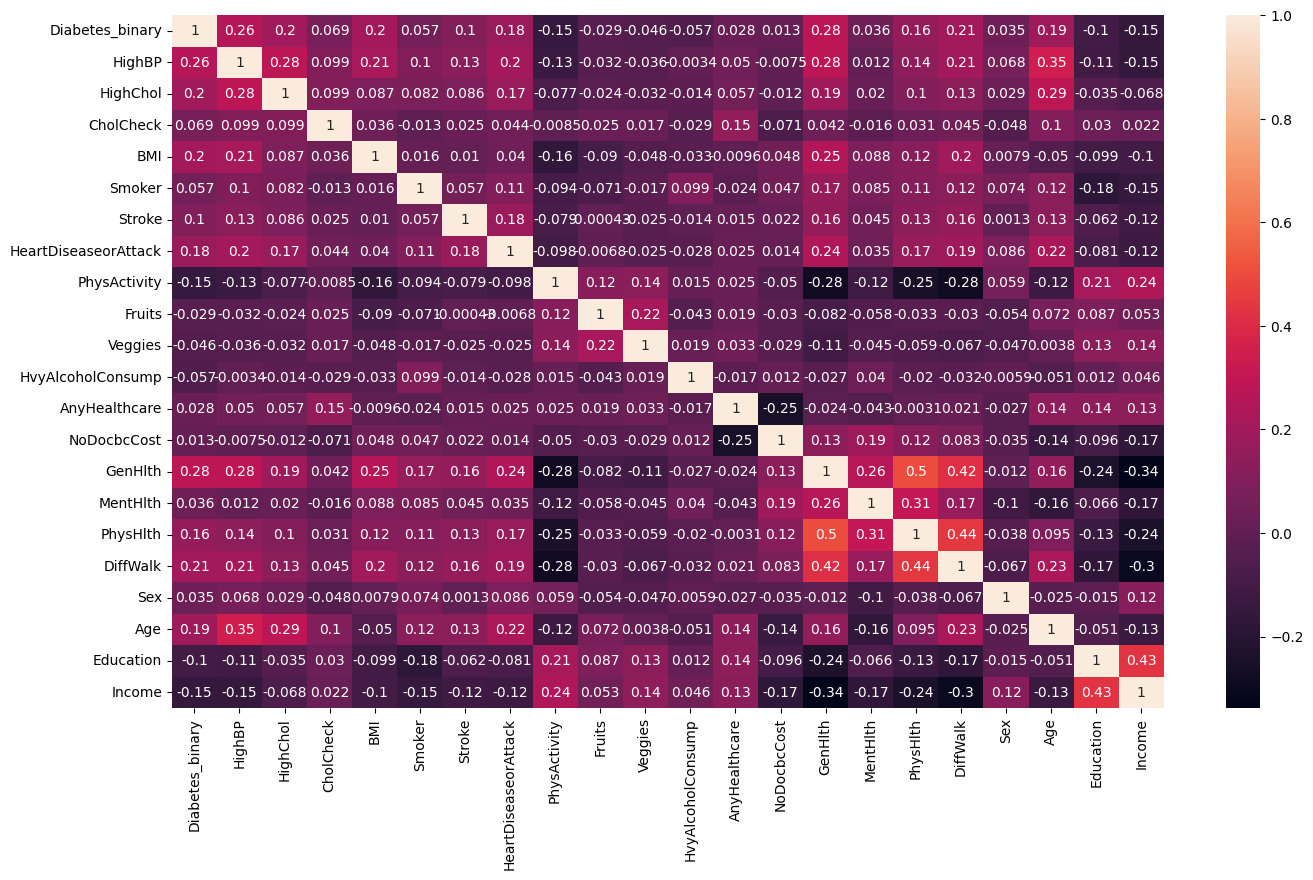

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(data_2021.corr(), annot=True);

In [6]:
data_2021_high_corr = data_2021[high_corr_features]

In [7]:
print(data_2021_high_corr)

        Diabetes_binary HighBP HighChol  BMI Stroke HeartDiseaseorAttack  \
0                     0      0        1   15      0                    0   
1                     1      1        0   28      0                    1   
2                     1      1        1   33      0                    0   
3                     1      0        1   29      1                    1   
4                     0      0        0   24      0                    0   
...                 ...    ...      ...  ...    ...                  ...   
236373                1      1        1   21      0                    0   
236374                0      1        0   25      0                    0   
236375                0      0        1   31      0                    0   
236376                0      1        0   24      0                    0   
236377                0      0        1   32      0                    0   

       PhysActivity GenHlth  PhysHlth DiffWalk  Age Education Income  
0               

In [21]:
# Create dummy variables
dat = pd.get_dummies(data_2021, drop_first=True)

# Separate features and target variable
X = dat.drop("Diabetes_binary", axis=1)
y = dat["Diabetes_binary"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

# Standard scaling on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to transform test data
X_test_scaled = scaler.transform(X_test)

# Oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)




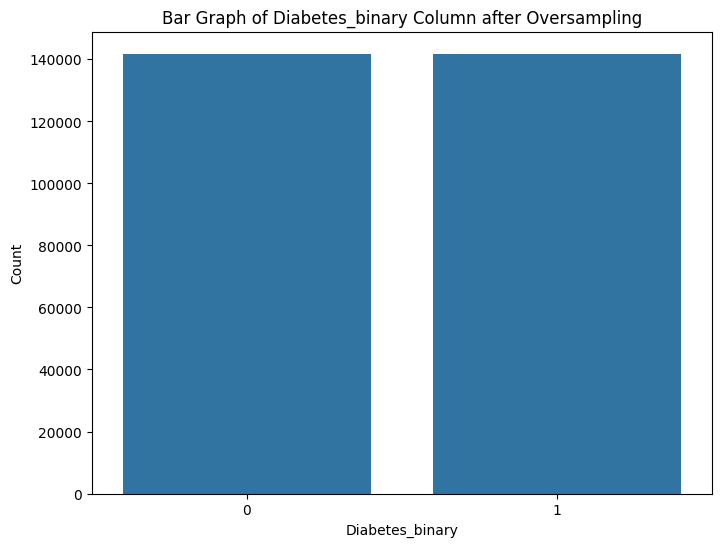

In [41]:
# Bar graph after over sampling

y_df = y_resampled.to_frame()

plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=y_df)
plt.title('Bar Graph of Diabetes_binary Column after Oversampling')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()


In [22]:
# Logistic Regression
logit_model = LogisticRegression()
logit_model.fit(X_resampled, y_resampled)
logit_pred_test = logit_model.predict(X_test_scaled)


# Confusion Matrix for Logistic Regression
conf_matrix_logit = confusion_matrix(y_test, logit_pred_test)
accuracy_logit = accuracy_score(y_test, logit_pred_test)

print("Logistic Regression:")
print("Confusion Matrix:")
print(conf_matrix_logit)
print("Accuracy:", accuracy_logit)



Logistic Regression:
Confusion Matrix:
[[43667 17327]
 [ 2361  7559]]
Accuracy: 0.7223679386298897


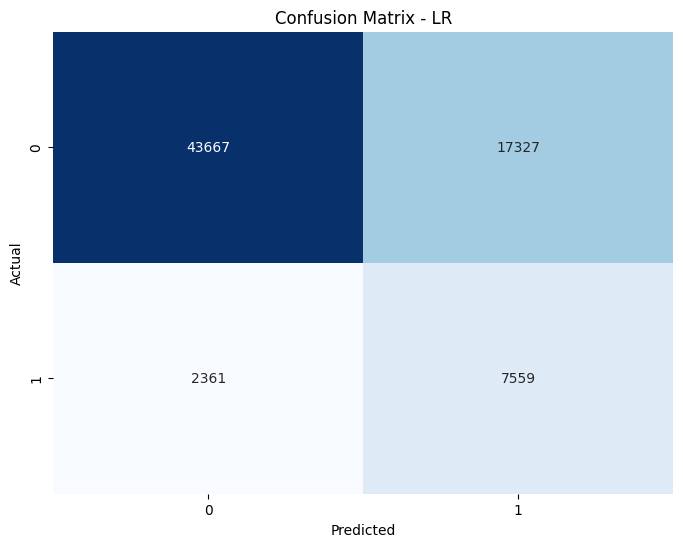

In [46]:
# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logit, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - LR")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
#Print Coeff
print("Coefficients:", logit_model.coef_)

# Print intercept
print("Intercept:", logit_model.intercept_)


Coefficients: [[ 0.45488748 -0.0703824  -0.04558903  0.52823741  0.39183571  0.30314376
   0.31976523 -0.0346335   0.04054215  0.05332575 -0.0728818   0.00566098
   0.03189693 -0.18256595  0.00238303  0.00689636  0.36363511  0.65618165
   0.61082774  0.38474461  0.0236328   0.16220811 -0.07125713 -0.12788139
  -0.34808026 -0.34140327 -0.4445685  -0.00780061 -0.03839855 -0.04366032
  -0.06539763 -0.11634614 -0.12883049 -0.14799838 -0.13336039 -0.12998574
  -0.1344937 ]]
Intercept: [-0.70990569]


In [23]:
import numpy as np
resampled_data = np.column_stack((X_resampled, y_resampled))

# Create a random sample with 10000 size
np.random.seed(42)  # Set random seed for reproducibility
random_indices = np.random.choice(resampled_data.shape[0], size=10000, replace=False)
random_sample = resampled_data[random_indices]

# Separate features and target variable from the random sample
random_sample_X = random_sample[:, :-1]
random_sample_y = random_sample[:, -1]

# Convert back to DataFrame if needed
random_sample_X = pd.DataFrame(random_sample_X, columns=dat.drop("Diabetes_binary", axis=1).columns)
random_sample_y = pd.Series(random_sample_y, name="Diabetes_binary")

In [24]:
X_train, X_test, y_train, y_test = train_test_split(random_sample_X, random_sample_y, test_size=0.2, random_state=42)


In [26]:
# Poly SVM tuning
svm = SVC(kernel='poly')
param_grid = {'degree': [2], 'C': [i for i in range(20)], 'gamma': ['scale']}
grid_search = GridSearchCV(svm, param_grid, cv=10)
grid_search.fit(random_sample_X, random_sample_y)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

GridSearchCV(cv=10, estimator=SVC(kernel='poly'),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19],
                         'degree': [2], 'gamma': ['scale']})

In [27]:
# Get best parameters
best_params = grid_search.best_params_

# Predict on test set
svm_pred_test = grid_search.predict(X_test)

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, svm_pred_test)
accuracy_svm = accuracy_score(y_test, svm_pred_test)

print("\nPoly SVM:")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("Accuracy:", accuracy_svm)



Poly SVM:
Confusion Matrix:
[[771 214]
 [206 809]]
Accuracy: 0.79


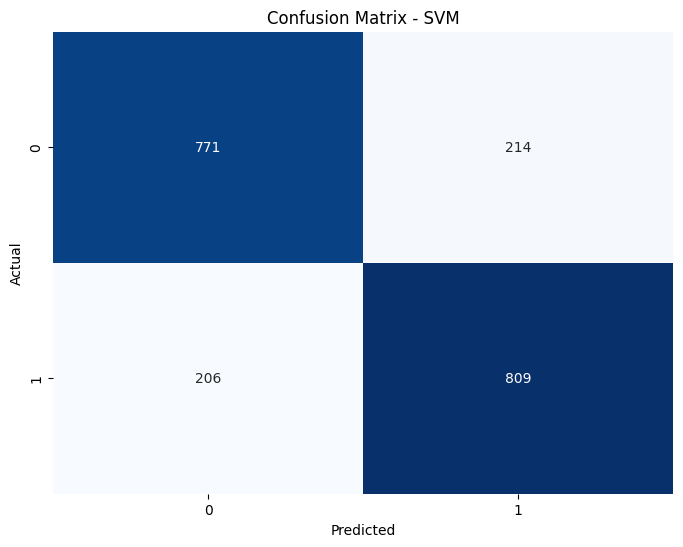

In [31]:
# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Create the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10)
grid_search_rf.fit(random_sample_X, random_sample_y)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [29]:
#Random Forest

rf_model.fit(X_resampled, y_resampled)

# Predict on test set
rf_pred_test = grid_search_rf.predict(X_test)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_pred_test)
accuracy_rf = accuracy_score(y_test, rf_pred_test)

print("Random Forest:")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Testing Accuracy:", accuracy_rf)

Random Forest:
Confusion Matrix:
[[ 977    8]
 [  13 1002]]
Accuracy: 0.9895


In [32]:
# Predict on training set
rf_pred_train = grid_search_rf.predict(X_train)

# Calculate training accuracy
accuracy_rf_train = accuracy_score(y_train, rf_pred_train)

# Print training accuracy
print("Training Accuracy:", accuracy_rf_train)


Training Accuracy: 0.987125


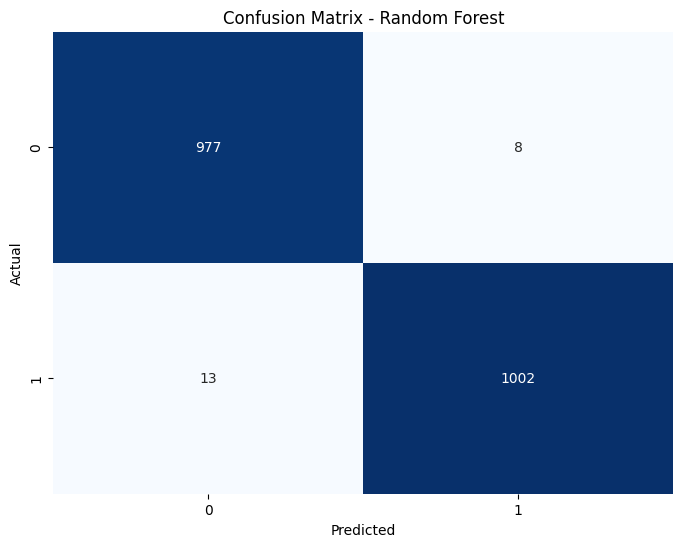

In [30]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


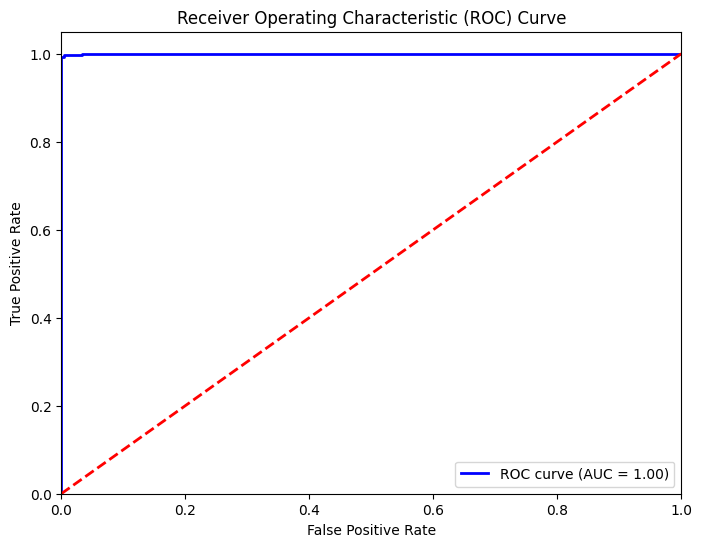

In [50]:
from sklearn.metrics import roc_curve, auc

# Assuming rf_model is your trained Random Forest model
# Assuming X_test and y_test are your test features and labels

# Predict probabilities for positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
